# Markotwitz Portfolio Optimization for 10 Stocks

This project seeked to perform Markowitz portfolio optimization on a bucket of stocks labeled as "10 of the Best Stocks to Buy for 2024" by US news report (https://money.usnews.com/investing/articles/best-stocks-to-buy-this-year). The goal was to use market data through December 2023 to to find the maximum Sharpe Ratio portfolio, and evaluate the portfolio's performance for 2024 through May.

|Company  |Ticker
|---------|---------|
|Grupo Aeroportuario del Sureste SAB de CV         |ASR      |
|Citigroup Inc.         |C        |
|Discover Financial Services         |DFS      |
|Walt Disney Co.         |DIS      |
|Alphabet Inc.         |GOOGL    |
|Match Group Inc         |MTCH     |
|Occidental Petroleum Corp.         |OXY      |
|PDD Holdings Inc.         |PDD      |
|Target Corp.         |TGT      |
|Pimco 25+ Year Zero Coupon U.S. Treasury Index ETF   |ZROZ     |

## Preliminary: Data Choice

The prompt suggested to use data from 2022 through 2023 to perform the folowing anaylsis, but this produced undesired results. Since 2022 was a poor year for stock performance, as the Fed had started to raise interest rates, the minimum variance portfolio had a negative return. This led to complications with the capital market line and the conclusion that the portfolio should be 100% bonds. I chose to reject this result and proceed with only 2023 data to reach a more interesting conclusion. This is a valid approach since the market regime has changed significantly since 2022, and I believe there are better, or at least more interesting to explore, portfolios that can be found. Additionally, it is important to constantly rebalance the portfolio, so focusing on more recent data will give a more accurate estimate of the true $\Sigma$ matrix. The results of 2022-2023 data are shown below:

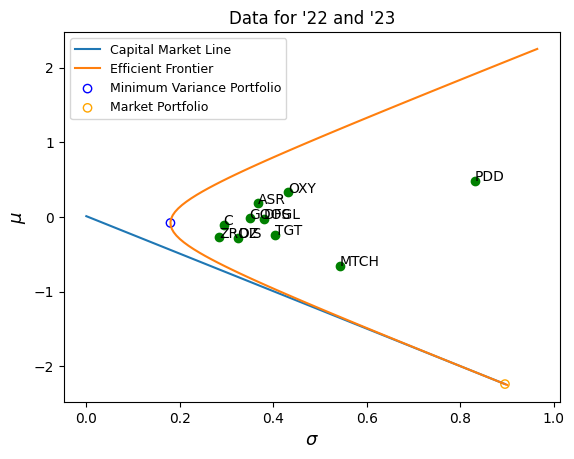

### Import Packages and Download Data

In [198]:
import yfinance as yf
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = yf.download(
    "GOOGL DFS DIS PDD OXY MTCH ASR TGT ZROZ C",
    start = '2023-01-01',
    end = '2023-12-31'
)

data.index = data.index.to_series().apply(lambda x: x.date())
data = data['Close']

[*********************100%%**********************]  10 of 10 completed


### a) Compute Daily Log Returns

In [199]:
# Take the ratio of the previous day's price
log_return = data / data.shift(1)

# Drop NA so log can be taken
log_return.dropna(inplace=True)

log_return = np.log(log_return)

log_return

Ticker,ASR,C,DFS,DIS,GOOGL,MTCH,OXY,PDD,TGT,ZROZ
Date,,,,,,,,,,
2023-01-04,0.001475,0.025449,0.043182,0.033272,-0.011738,0.028807,0.000982,0.074412,0.006504,0.019311
2023-01-05,0.023464,-0.004482,-0.017130,-0.000653,-0.021575,0.005663,0.018001,0.046874,0.010033,0.007838
2023-01-06,0.026203,0.011907,0.034457,0.021525,0.013138,-0.003536,0.024293,0.005538,0.037471,0.025480
2023-01-09,0.009343,0.004850,0.008119,0.009010,0.007756,0.035262,0.005163,-0.004596,-0.024014,0.006112
2023-01-10,0.004620,0.013580,0.016517,0.008301,0.004534,0.024765,0.001092,-0.015084,-0.002433,-0.025000
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.004464,0.005125,-0.001531,-0.010927,0.007591,0.001706,0.006103,-0.015385,0.005938,-0.007117
2023-12-26,0.008442,0.009393,0.005929,-0.000769,0.000212,0.005101,0.010307,0.005109,0.005903,0.002105
2023-12-27,-0.014922,0.002335,0.005270,-0.006287,-0.008159,0.012081,-0.006532,-0.005316,0.009527,0.025835


### b) Estimate Annualized Log-Return

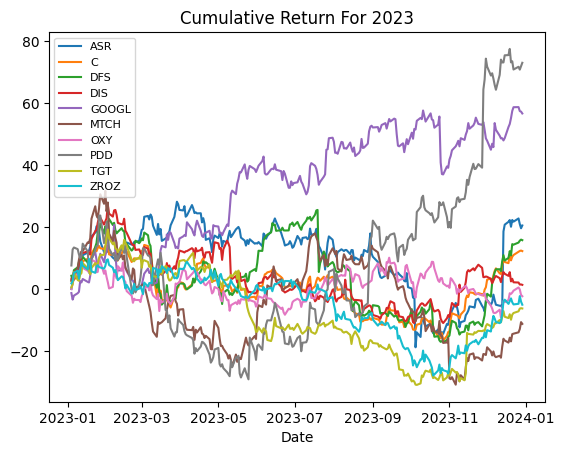

In [200]:
# Obtain cumulative returns
cumulative_return = (np.exp(log_return.cumsum()) - 1) * 100

cumulative_return.plot()
plt.title('Cumulative Return For 2023')
plt.legend(fontsize=8)
plt.show()

### Estimate Annualized Variance-Covariance Log-Return

####### Robust Mu
                
Ticker          
ASR     0.086148
C       0.247485
DFS     0.523170
DIS     0.027067
GOOGL   0.470387
MTCH   -0.089099
OXY     0.288498
PDD     0.045258
TGT    -0.196055
ZROZ    0.164641

####### Robust Variance-Covariance Matrix
Ticker       ASR         C       DFS       DIS     GOOGL      MTCH       OXY  \
Ticker                                                                         
ASR     0.066095  0.020249  0.012265  0.015035  0.012951  0.020309  0.003832   
C       0.020249  0.052071  0.038356  0.026889  0.011924  0.030869  0.027403   
DFS     0.012265  0.038356  0.062314  0.029610  0.013339  0.043649  0.020633   
DIS     0.015035  0.026889  0.029610  0.049231  0.020205  0.032799  0.016628   
GOOGL   0.012951  0.011924  0.013339  0.020205  0.068506  0.029213  0.008884   
MTCH    0.020309  0.030869  0.043649  0.032799  0.029213  0.129090  0.013732   
OXY     0.003832  0.027403  0.020633  0.016628  0.008884  0.013732  0.069399   
PDD     0.02384

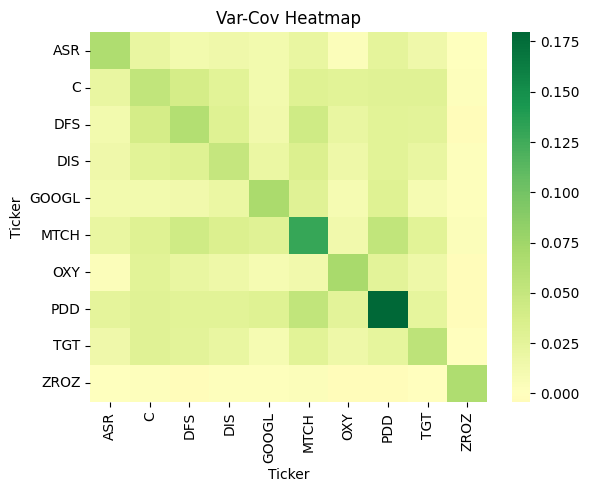

In [201]:
from sklearn.covariance import MinCovDet
import seaborn as sns

# Robust Covariance Estimation using MCD method
mcd = MinCovDet()

mcd.fit(log_return)

robust_vcov = pd.DataFrame(mcd.covariance_, columns=data.columns, index = data.columns)
annual_robust_vcov = robust_vcov * 252 # annualize daily value

robust_mu = pd.DataFrame(mcd.location_, index=data.columns, columns = [''])
annual_robust_mu = robust_mu * 252 # annualize daily value

### Normal Covariance Estimation for testing purposes
# robust_vcov = pd.DataFrame(log_return.cov(), columns=data.columns, index = data.columns)
# annual_robust_vcov = robust_vcov * 252

# robust_mu = pd.DataFrame(log_return.mean(), index=data.columns, columns = [''])
# annual_robust_mu = robust_mu * 252


print('####### Robust Mu')
print(annual_robust_mu)
print('')

print("####### Robust Variance-Covariance Matrix")
print(annual_robust_vcov)

sns.heatmap(annual_robust_vcov, cmap='RdYlGn', center=0)
plt.title('Var-Cov Heatmap')
plt.show()

### d) Minimum Variance Portfolio

#### Minimum Variance Portfolio
We seek to solve the following problem:  
$$\min_w  w^T\Sigma w \quad \text{subject to} \quad w^T \mathbb{1}=1$$  
which has the solution:
$$w^{\star}=(1^T\Sigma 1)^{-1}\Sigma ^{-1}1 \quad \text{with mean} \quad m^Tw^{\star}=(1^T\Sigma 1)^{-1}m^T\Sigma ^{-1}1 \quad \text{and variance} \quad w^{\star^T} C w^{\star}=\frac{1}{1^T C^{-1} 1}$$
  
Note: no restriction was placed on short-selling

In [202]:
ones = np.ones(len(annual_robust_mu.values))
iC = np.linalg.inv(annual_robust_vcov)
w_star = (np.dot(ones.T , np.dot(iC, ones)))**-1 * np.dot(iC, ones)

mu_star = np.dot(w_star.T, annual_robust_mu)
v_star = np.dot(w_star.T, np.dot(annual_robust_vcov, w_star))

print(f"sigma_star: {round(np.sqrt(v_star),3)}, mu_star: {round(mu_star[0],3)}")

sigma_star: 0.129, mu_star: 0.205


### c) Plot the Minimum Variance Curve

To plot the minimum variance curve, we must solve the same optimization problem as before, with an additional constraint:
$$\min_w  w^T\Sigma w \quad \text{subject to} \quad w^T \mathbb{1}=1 \quad \text{and} \quad w^T m = \dot{\mu}$$  
This problem is formulated such that given a range of $\mu$ (y) values, we can obtain the corresponding minimum variance (x) values to create the minimum variance curve, also known as the efficient frontier. The solution is such that the points
$$(\sqrt{\tilde{\mu}(\tilde{m}^TC^{-1}\tilde{m})^{-1}\tilde{\mu}}, \dot{\mu})$$
form the Markowitz bullet, where $\tilde{\mu}=(1,\dot{\mu})^T$ and $\tilde{m}=(1,\dot{m})$, where the first is a two-entry, one dimensional vector, and the second is a 10x2 matrix.

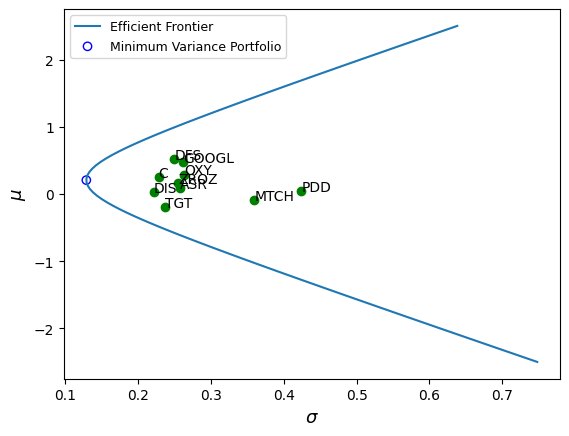

In [203]:
# Minimum Variance Curve
def min_std_curve(mu, means, vcov):
    "Takes a mu (y) value and returns the corresponding minimum std (x)"
    iC = np.linalg.inv(vcov)
    ones = np.ones(len(means.values))
    meanstil = np.hstack((ones.reshape((-1,1)), means.values))
    mutil = np.array([1., mu]).reshape((-1,1))
    
    x = np.sqrt(
        mutil.T @ np.linalg.inv(meanstil.T @ iC @ meanstil) @ mutil
    )
    return x[0][0]


mus = np.linspace(-2.5, 2.5, 100)

x = [min_std_curve(mu, annual_robust_mu, annual_robust_vcov) for mu in mus]

plt.plot(x, mus, label='Efficient Frontier')
plt.scatter(np.sqrt(v_star), mu_star, facecolors='none', edgecolors='b', label='Minimum Variance Portfolio')

plt.scatter(np.sqrt(np.diag(annual_robust_vcov)), annual_robust_mu, color='g')
plt.xlabel('$\sigma$', fontsize=13)
plt.ylabel('$\mu$', fontsize=13)
for i in range(10):
    plt.text(np.sqrt(np.diag(annual_robust_vcov))[i], annual_robust_mu.values[i], data.columns[i])
plt.legend(fontsize=9)
plt.show()

### e) Capital Market Line

The capital market line is a tangent line between the risk free rate ($\mu$=r, $\sigma$=0) and the efficient portfolio frontier. The intersection of the CAPM line and the effficient frontier is known as the "market portfolio," which represents the highest Sharpe Ratio portfolio available at that risk free rate. Although the efficient frontier reprsents all portfolios with the lowest variance for a given mean, this does not consider the available risk free asset. Thus, the market portfolio has the highest available Sharpe Ratio (also the slope), but so does any point on this tangent line. It follows that an investor can obtain the maximum Sharpe Ratio and also lower their risk by taking a portfolio somewhere on the capital market line. A portfolio on this line has $w_1^{\star}$ of the risk free asset and $w_2^{\star}$ of the market portfolio, where $w_1^{\star}$ + $w_2^{\star}$ = 1. To determine the overall weights of the individual stocks, we take $w_2^{\star}$ * $w_m$ where $w_m=[w_1,... ,w_n]^T$.

Market portfolio for r=0.01: sigma_m=0.34, mu_m=1.35
Market portfolio for r=0.05: sigma_m=0.41, mu_m=1.64
Market portfolio for r=0.1: sigma_m=0.59, mu_m=2.33


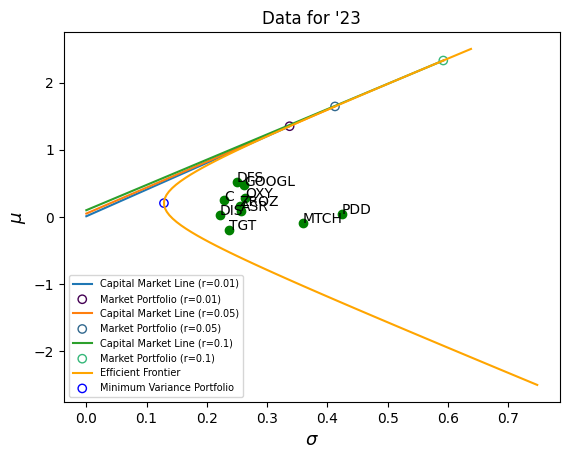

In [204]:
import matplotlib.cm as cm

# Market Portfolio
def market_portfolio(mus, vcov, r):
    """
    Determine the mean and variance of the tangent (market) portfolio
    given a risk free rate r
    """

    iC = np.linalg.inv(vcov)
    mus = np.array(mus).reshape(-1,1)
    ones = np.ones(len(mus)).reshape(-1,1)

    w_m = (iC @ (mus - r*ones) / (ones.T @ iC @ (mus - r*ones))).flatten()
    mu_m = (np.dot(w_m.T, mus))[0]
    v_m = (np.dot(w_m.T, np.dot(vcov, w_m)))

    return w_m.flatten(), mu_m, np.sqrt(v_m)


# Define arrays to hold solutions
rs = np.array([.01, .05, .1])
w_m = np.zeros((len(annual_robust_mu.values), len(rs)))
mu_m = np.zeros(len(rs))
sigma_m = np.zeros(len(rs))


for i, r in enumerate(rs):
    # Determine the market portfolio weights at each r
    w_m[:, i], mu_m[i], sigma_m[i] = market_portfolio(annual_robust_mu, annual_robust_vcov, r)

    # Print resulting market portfolios
    print(f"Market portfolio for r={rs[i]}: sigma_m={round(sigma_m[i],2)}, mu_m={round(mu_m[i],2)}")

    # Plot CAPM lines at diferent risk free rates
    sigs = np.linspace(0,sigma_m[i],100)
    cap_market_line = [rs[i] + (mu_m[i] - rs[i]) * sig / sigma_m[i] for sig in sigs]
    plt.plot(sigs, cap_market_line, label=f'Capital Market Line (r={rs[i]})')
    
    # Plot market portfolio
    plt.scatter(sigma_m[i], mu_m[i], facecolors='none', edgecolors=cm.viridis(i / len(rs)), label=f'Market Portfolio (r={rs[i]})')


# Plot minimum variance curve
plt.plot(x, mus, label='Efficient Frontier', color='orange')

# Plot minimum variance portfolio
plt.scatter(np.sqrt(v_star), mu_star, facecolors='none', edgecolors='b', label='Minimum Variance Portfolio')

# Plot individual stocks
plt.scatter(np.sqrt(np.diag(annual_robust_vcov)), annual_robust_mu, color='g')

plt.xlabel('$\sigma$', fontsize=13)
plt.ylabel('$\mu$', fontsize=13)
for i in range(10):
    plt.text(np.sqrt(np.diag(annual_robust_vcov))[i], annual_robust_mu.values[i], data.columns[i])
plt.legend(fontsize=7)
plt.title("Data for '23")
plt.show()

My final portfolio recommendation depends on the risk free rate. If r=.01, I would recommend a full allocation to the market portfolio; if r=.05, I would recommend 25% of the risk free asset; if r=.1 I would recommend 50% of the risk free asset. This is based on the fact that 2023 was a great year and although the market portfolio suggests a much higher return, a 10% return on the risk free asset is about the average annual market return with no risk, and thus too good to turn down.

## Performance Evaluation

For the following analysis, a **risk free rate of .05** was assumed to reflect the market conditions going into 2024. Thus, the performance of a 25% risk free / 75% market portfolio is examined over the period Jan 1, 2024 - March 31, 2024.

### Market Portfolio

|           | ASR  | C    | DFS  | DIS   | GOOGL | MTCH  | OXY  | PDD  | TGT  | ZROZ |
|-----------|------|------|------|-------|-------|-------|------|------|------|------|
| **Weight**| 0.13 | 0.04 | 1.65 | -0.78 | 0.87  | -0.51 | 0.30 | -0.07| -0.95| 0.32 |

### Final Portfolio

In [205]:
# Establish portfolio weights for market and risk free
w_rf = .25
w_market = .75
w_stocks = w_market * w_m[:,1]

print(f"Weights sum to one: {np.allclose(np.sum(w_stocks) + w_rf,1)}")

Weights sum to one: True


In [206]:
# Obtain data through the performance period
data_performance = yf.download(
    "GOOGL DFS DIS PDD OXY MTCH ASR TGT ZROZ C",
    start = '2024-01-01',
    end = '2024-05-31'
)

data_performance.index = data_performance.index.to_series().apply(lambda x: x.date())
data_performance = data_performance['Close']

[*********************100%%**********************]  10 of 10 completed


In [207]:
# Determine % change of stocks through the period
stock_returns = (data_performance.iloc[-1] - data_performance.iloc[0]) / data_performance.iloc[0]

# Determine total return based on portfolio weights
stock_total_return = np.dot(stock_returns.values, w_stocks)

# Determine total return of portfolio based on its two components
total_return = stock_total_return + w_rf * (np.exp(.05 * 5/12) - 1)

print(f"Portfolio return from 1/24 through 5/24 (not annualized): {round(total_return*100,1)}%")

Portfolio return from 1/24 through 5/24 (not annualized): 21.7%


|           | ASR  | C    | DFS  | DIS   | GOOGL | MTCH  | OXY  | PDD  | TGT  | ZROZ | Risk-Free |
|-----------|------|------|------|-------|-------|-------|------|------|------|------|-----------|
| **Weight**| 0.10 | 0.03 | 1.24 | -0.59 | 0.66  | -0.38 | 0.23 | -0.05| -0.61| 0.24 | .25       |
| **Return**|.17   |.17   | .08  | .12   |.25    |-.18   |.02   | .04  | .05  | -.14 | .05       |
| **Weighted Return**|.02|.01|.10|-.07   |.16    |.07    |.00   |.00   |-.03  |-.03  |.00        |